# Сборный проект - 1

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.     

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Оглавление:
* [Шаг 1 - изучение данных](#first-bullet)
* [Шаг 2 - Подготовка данных](#second-bullet)
* [Шаг 3. Проведите исследовательский анализ данных](#third-bullet)
* [Шаг 4. Составьте портрет пользователя каждого региона](#fourth-bullet)
* [Шаг 5. Проверьте гипотезы](#fifth-bullet)
* [Шаг 6. Напишите общий вывод](#sixth-bullet)

## Шаг 1 - изучение данных <a class="anchor" id="first-bullet"></a>

###  Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import seaborn as sns

In [2]:
try:
    games = pd.read_csv('/home/juliya/Загрузки/games.csv')
except:
    games = pd.read_csv('/datasets/games.csv')
    
display(games.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [5]:
games['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Что вижу по таблице:
1. Нужно изменить названия колонок, чтобы всё было в нижнем регистре
2. Стоблец с годом релиза - можно перевести в int/datetime
3. В столбце с жанрами нет неявных дублей
4. Есть пропуски в стоблуах с оценками. Предварительно можно выдвинуть гипотезу о том, что оценок критиков нет у старых фильмов
5. Столбец с рейтингом - включает в себя категориальные переменные
6. Столбец с оценками пользвателей - нужно изменить тип данных на float
7. Столбец с оценками критиков - перевести в int

## Шаг 2 - Подготовка данных  <a class="anchor" id="second-bullet"></a> 

### Задание 1:   
Замените названия столбцов (приведите к нижнему регистру)

In [6]:
games = games.rename(
   columns={
       'Name':'name',
       'Platform':'platform',
       'Year_of_Release':'year_of_release',
       'Genre':'genre',
       'NA_sales':'na_sales',
       'EU_sales':'eu_sales',
       'JP_sales':'jp_sales',
       'Other_sales':'other_sales',
       'Critic_Score':'critic_score',
       'User_Score':'user_score',
       'Rating':'rating'
   })
display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Задание 2 и 3: 

2. Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
3. Обработайте пропуски при необходимости. Объясните, почему заполнили пропуски определённым образом или почему не стали это делать. Опишите причины, которые могли привести к пропускам. Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;



In [7]:
print(games['year_of_release'].isna().sum())

269


In [8]:
games = games.dropna(subset=['year_of_release'])

In [9]:
games['year_of_release'] = pd.to_datetime(games['year_of_release'], format='%Y')
games['year_of_release'] = pd.DatetimeIndex(games['year_of_release']).year

In [10]:
print(games['user_score'].value_counts().head())

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
Name: user_score, dtype: int64


In [11]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

В данном столбце встречались значения 'tbd'. Судя по переводу такие данные нужно вводить отдельно, но их довольно много, поэтому ставлю замену в виде пропуска.

In [12]:
# пытаюсь понять как оптимальнее обработать пропуски в столбцах 'critic_score','user_score'
print(games.pivot_table(index='genre',values=['critic_score','user_score'], aggfunc=['mean', 'median']))

                     mean                  median           
             critic_score user_score critic_score user_score
genre                                                       
Action          66.676931   7.058129         68.0        7.4
Adventure       65.268750   7.139597         66.0        7.6
Fighting        69.155556   7.295949         72.0        7.6
Misc            66.648330   6.805828         69.0        7.1
Platform        68.124490   7.305896         69.5        7.7
Puzzle          67.231818   7.138400         70.0        7.5
Racing          68.006897   7.040859         69.0        7.4
Role-Playing    72.655267   7.624423         74.0        7.8
Shooter         70.260022   7.053260         73.0        7.4
Simulation      68.609195   7.132153         70.0        7.5
Sports          71.993133   6.951434         75.0        7.4
Strategy        72.158784   7.294426         73.0        7.8


In [14]:
display(games['rating'].isna().sum())
games['rating'].value_counts()

6678

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

Объяснения:
1. 'year_of_release' - перевожу в datetime. Пропуски удаляю тк их немного, это не повляет на данные
2. 'user_score' - перевожу в float, тк стоит тип object.
3. 'rating' пропуски оставляю тк на основе текущих данных заменить их чем-либо нельзя. Удалять пропуски будет тоже плохо тк их слишком много, это сильно исказит данные

In [15]:
# проверка на полные дубликаты строк
print(games.duplicated().sum())

0


In [16]:
# проверка на наличие неявных дубликатов (совпадающие по названию, платформе и году релиза одновременно)
display(games.duplicated(['name', 'platform', 'year_of_release']).sum())

2

In [17]:
# проверяю размер таблицы, чтобы после удаления дублей сравнить
games.shape

(16446, 11)

In [18]:
# удаление 2х дублей
games = games.drop_duplicates(['name', 'platform', 'year_of_release'])

In [19]:
games.shape

(16444, 11)

### Задание 3:   
Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец 

In [20]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

Вывод:

1. Названия столбцов приведены в нижний регистр
2. В столбцах "year_of_release" и "user_score" изменен тип данных 
3. Обработаны значения "tbd" в стоблце "user_score"
4. Пропуски в оценках пользователей и критиков оставлены тк оценки уже являются усредненным значением выборки оценок некоторого количества пользователей
5. Произведена проверка на наличие дубликатов

## Шаг 3. Проведите исследовательский анализ данных   <a class="anchor" id="third-bullet"></a>

### Задание 1:
Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

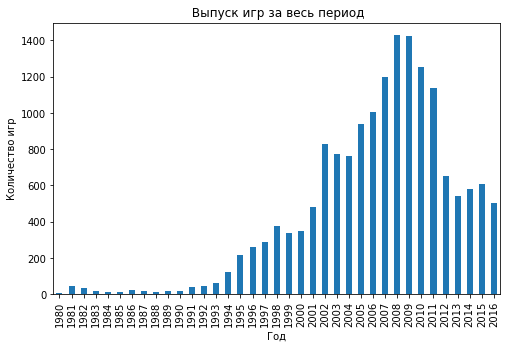

In [21]:
#print(games.pivot_table(index='year_of_release', values='name', aggfunc='count').sort_values(by='name', ascending=False).plot(kind='bar'))
games.pivot_table(index='year_of_release',
                  values='name', aggfunc='count').plot(kind='bar',
                  title=' Выпуск игр за весь период', figsize=(8,5), legend=False)
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

Первое, что бросается в глаза - быстрый рост до 2008 года. Далее идет спад по количеству выпускаемых игр

На мой взгляд, тк нам нужно планировать кампанию на 2017, то оптимальнее брать данные за последние 3года (макс 5 лет), чтобы отследить тренды, оценки и выпустить более актуальное предложение

### Задание 2:
Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?


In [22]:
max_sale = games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales' , ascending=False).head(10)
print(max_sale)

          total_sales
platform             
PS2           1233.56
X360           961.24
PS3            931.33
Wii            891.18
DS             802.78
PS             727.58
PS4            314.14
GBA            312.88
PSP            289.53
3DS            257.81


In [23]:
platform_max_sales = ['PS2', 'X360', 'PS3', 'Wii', 'DS']

AxesSubplot(0.125,0.125;0.775x0.755)


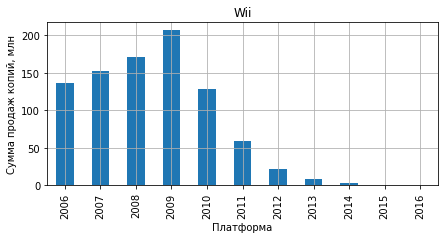

AxesSubplot(0.125,0.125;0.775x0.755)


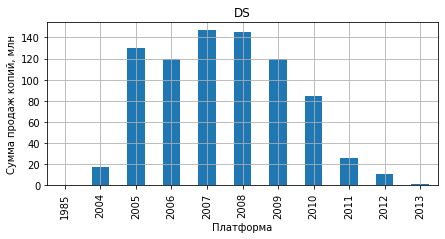

AxesSubplot(0.125,0.125;0.775x0.755)


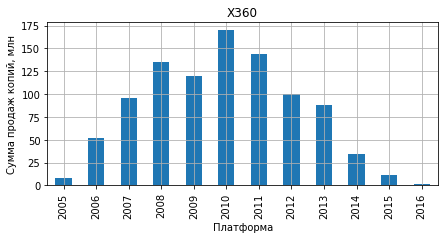

AxesSubplot(0.125,0.125;0.775x0.755)


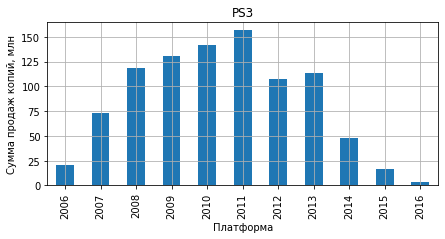

AxesSubplot(0.125,0.125;0.775x0.755)


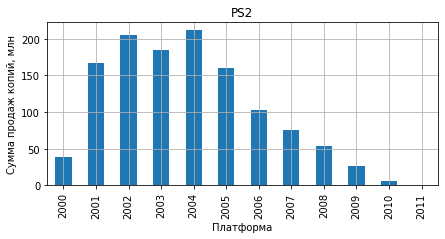

In [24]:
# размер графиков подобран для удобного изучения на небольшом экране ноута (какой и есть у меня)
for pl in games['platform'].unique():
    for pl_2 in platform_max_sales:
        if pl == pl_2:
            print(games.loc[games['platform'] == pl].pivot_table(index=['year_of_release'],
                       values='total_sales', aggfunc='sum').plot(kind='bar', grid=True, title=pl,
                                                                 figsize=(7,3), legend=False))
            plt.xlabel('Платформа')
            plt.ylabel('Сумма продаж копий, млн')
            plt.show()

Вывод:
1. Платформа Wii появилась в 2006 году. Пик продаж игр пришелся на 2009 год. Далее пошел спад интереса
2. Платформа DS - основной массив игр вышло с 2005 по 2009 год
3. Платформа X360 появилась в 2005 году. Пик продаж копий пришелся на 2010 год. Далее пошел спад интереса
4. Платформа PS3 появилась в 2006 году. Пик продаж копий пришелся на 2011 год. Далее пошел спад интереса
5. Платформа PS2 появилась в 2000 году. Пик продаж копий пришелся на 2004 год. Далее пошел спад интереса

AxesSubplot(0.125,0.125;0.775x0.755)


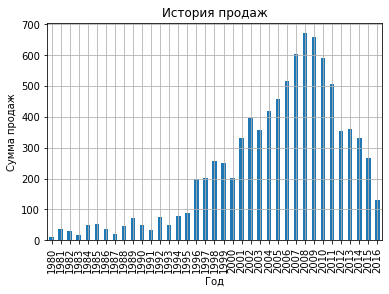

In [25]:
print(games.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').
      plot(kind='bar', grid=True, title='История продаж', legend=False))
plt.xlabel('Год')
plt.ylabel('Сумма продаж')
plt.show()

Вывод:
1. С 1993 года виден устойчивый рост интреса к игровой индустрии
2. Пик продаж копий приходится на 2008 год. Можем выдвинуть гипотезу - был пик по выпуску игр, соотвественно и покупали больше 
3. После 2009 года начался спад по покупке игр
4. В 2016 году продажи игр снизились в 2 раза (по сравнению с 2015г), хотя объемы появления новых игр снизились незначительно за тот год

In [26]:
# считаю количество лет жизни платформ
years_of_exist = games.pivot_table(index='platform' , values='year_of_release', aggfunc=['max', 'min'])
years_of_exist.columns = ['lasr_year', 'first_year']
years_of_exist['count_years'] = years_of_exist['lasr_year'] - years_of_exist['first_year']
print(years_of_exist.sort_values(by='count_years', ascending=False))
print(years_of_exist['count_years'].median())
print(years_of_exist['count_years'].mean())

          lasr_year  first_year  count_years
platform                                    
PC             2016        1985           31
DS             2013        1985           28
GB             2001        1988           13
X360           2016        2005           11
PSP            2015        2004           11
PS2            2011        2000           11
NES            1994        1983           11
DC             2008        1998           10
Wii            2016        2006           10
PS3            2016        2006           10
2600           1989        1980            9
SNES           1999        1990            9
PS             2003        1994            9
XB             2008        2000            8
GBA            2007        2000            7
GC             2007        2001            6
N64            2002        1996            6
3DS            2016        2011            5
PSV            2016        2011            5
SAT            1999        1994            5
WiiU      

Вывод:
Медианное значение жизни одной платформы - 6 лет. Есть довольно старая платформа, которая пользуется спросом и в 2016 году. Также есть платформы, которые существуют от 0 до 2х и перестают быть актуальными для пользователей

In [27]:
# код ревьюера
games.groupby('platform')['year_of_release'].nunique().mean()

7.67741935483871

### Задание 3:
Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Не учитывайте в работе данные за предыдущие годы.

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [28]:
games_actual = games.query('year_of_release >= 2013')

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Ориентируюсь на период с 2013 года тк эти данные более актуальные и позволят увидеть реальную картину - что происходит сейчас на рынке
</div>

AxesSubplot(0.125,0.125;0.775x0.755)


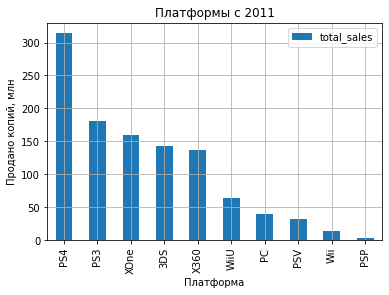

In [29]:
print(games_actual.pivot_table(index='platform', values='total_sales', aggfunc='sum').
      sort_values(by='total_sales', ascending=False).head(10).
      plot(kind='bar', grid=True, title='Платформы с 2011'))
#print(sales_platform.sort_values(by='total_sales', ascending=False))

plt.xlabel('Платформа')
plt.ylabel('Продано копий, млн')
plt.show()

Вывод:
1. Самая популярная платформа в выделенный период - PS4
2. Сравнивая с продажами за весь период видно, что теряет позици платформа Wii 
3. Интересное наблюдение, что PS2 - самая распространненая платформа за все время (вывод по общим продажам), на текущий момент не пользуется особым спросом и даже не входит в топ 10
4. 3DS кажется сравнительно молодой платформой, но которая интересует аудиторию (на текущий момент на 4м месте по продажам)
5. Выделяется платформа Xone. Имеет хороший потенциал

### Задание 4:
Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат

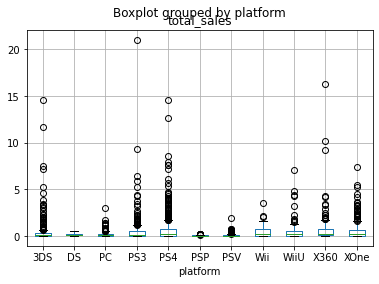

In [30]:
games_actual.boxplot(column='total_sales', by='platform')
plt.show()

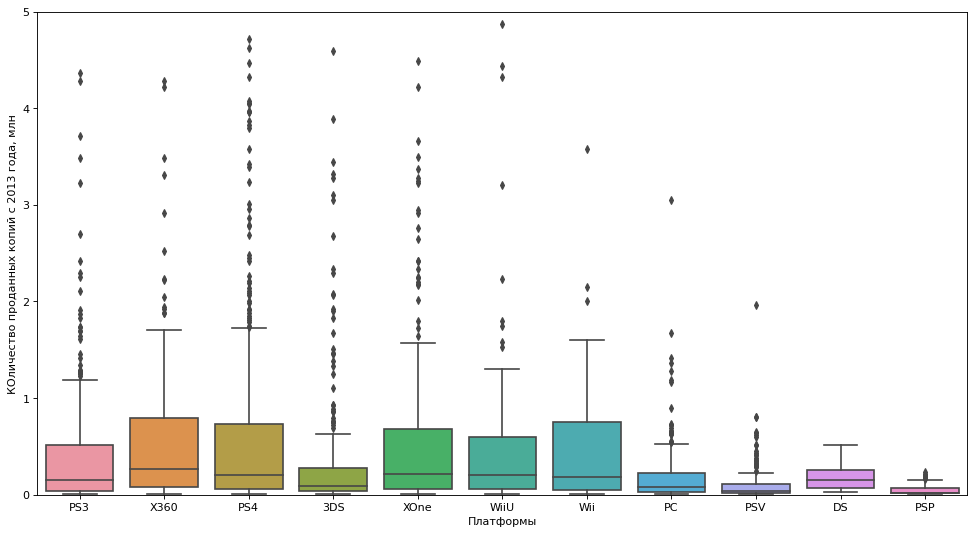

In [31]:
plt.figure(figsize=(15,8), dpi= 80)
sns.boxplot(x='platform', y='total_sales', data=games_actual, notch=False)
#plt.yscale('logit')
plt.ylim(0, 5)
plt.xlabel('Платформы')
plt.ylabel('КОличество проданных копий с 2013 года, млн')
plt.show()

In [32]:
display(games_actual.groupby('platform')['total_sales'].median())

platform
3DS     0.090
DS      0.150
PC      0.080
PS3     0.150
PS4     0.200
PSP     0.020
PSV     0.040
Wii     0.180
WiiU    0.200
X360    0.265
XOne    0.220
Name: total_sales, dtype: float64

In [33]:
display(games_actual.groupby('platform')['total_sales'].mean())

platform
3DS     0.472772
DS      0.192500
PC      0.208624
PS3     0.525884
PS4     0.801378
PSP     0.052239
PSV     0.092151
Wii     0.593913
WiiU    0.562000
X360    0.735484
XOne    0.645020
Name: total_sales, dtype: float64

Вывод:
1. На всех платформах есть игры, которые приносили в разы больше медианного значения продаж копий
2. Медианное значение для всех платформ от 80 до 265 тыс проданных копий

### Задание 5:
Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Соотнесите выводы с продажами игр на других платформах.

Корреляция между продажами копий и отзывами пользователей для PS3 0.0023944027357566925


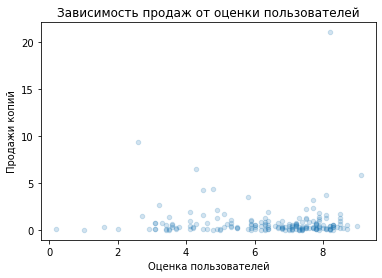

Корреляция между продажами копий и отзывами пользователей для X360 -0.011742185147181342


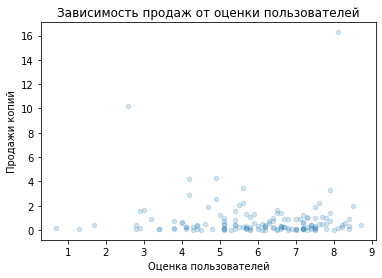

Корреляция между продажами копий и отзывами пользователей для PS4 -0.031957110204556376


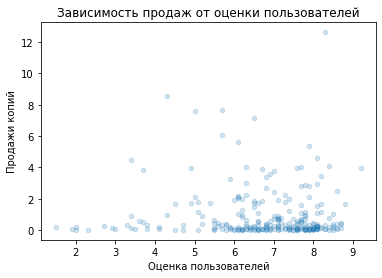

Корреляция между продажами копий и отзывами пользователей для 3DS 0.24150411773563016


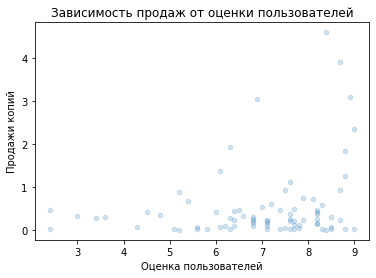

Корреляция между продажами копий и отзывами пользователей для XOne -0.06892505328279412


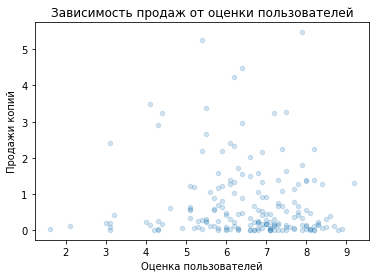

Корреляция между продажами копий и отзывами пользователей для WiiU 0.4193304819266187


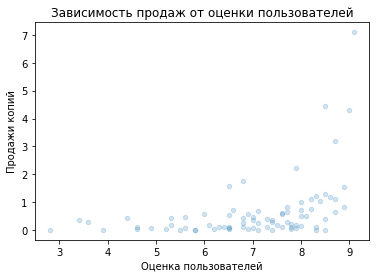

Корреляция между продажами копий и отзывами пользователей для Wii 0.6829417215362368


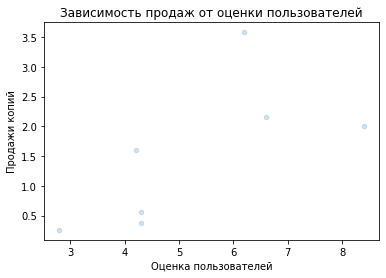

Корреляция между продажами копий и отзывами пользователей для PC -0.09384186952476739


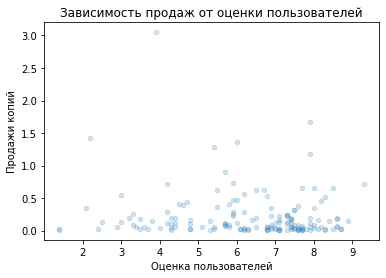

Корреляция между продажами копий и отзывами пользователей для PSV 0.0009424723319108626


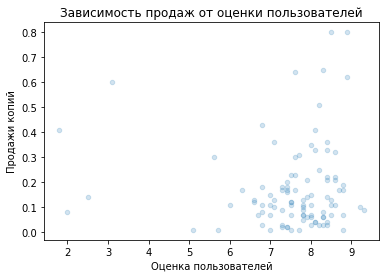

Корреляция между продажами копий и отзывами пользователей для DS nan


/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


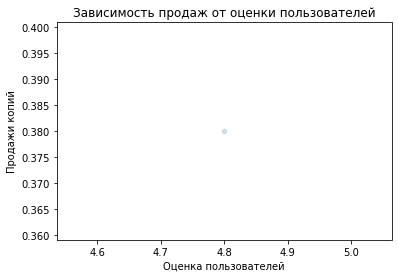

Корреляция между продажами копий и отзывами пользователей для PSP -0.9999999999999999


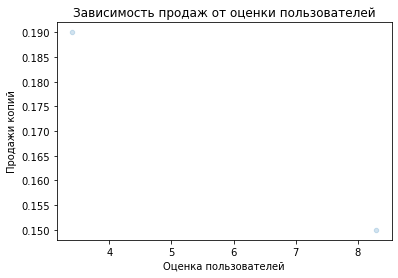

In [34]:
for platforms in games_actual['platform'].unique():
    pl = games_actual.loc[games_actual['platform'] == platforms, :]
    print('Корреляция между продажами копий и отзывами пользователей для', platforms, pl['total_sales'].corr(pl['user_score']))
    pl.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.2,title='Зависимость продаж от оценки пользователей')
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Продажи копий')
    plt.show()

Корреляция между продажами копий и отзывами критиков для PS3 0.0023944027357566925


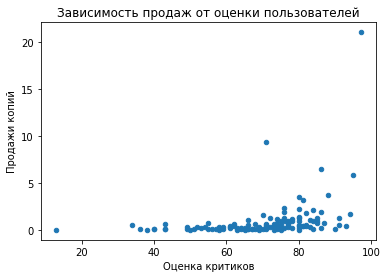


Корреляция между продажами копий и отзывами критиков для X360 -0.011742185147181342


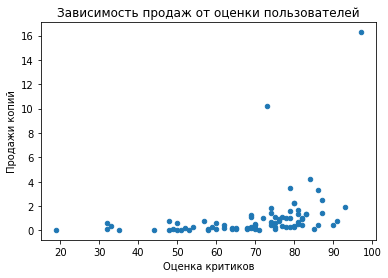


Корреляция между продажами копий и отзывами критиков для PS4 -0.031957110204556376


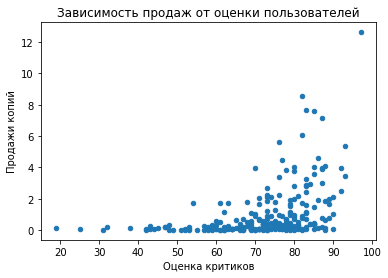


Корреляция между продажами копий и отзывами критиков для 3DS 0.24150411773563016


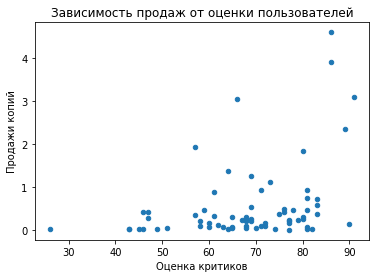


Корреляция между продажами копий и отзывами критиков для XOne -0.06892505328279412


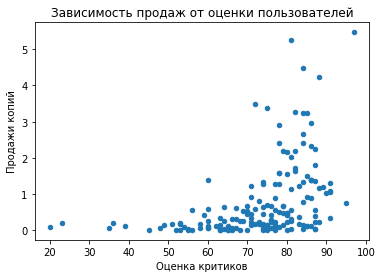


Корреляция между продажами копий и отзывами критиков для WiiU 0.4193304819266187


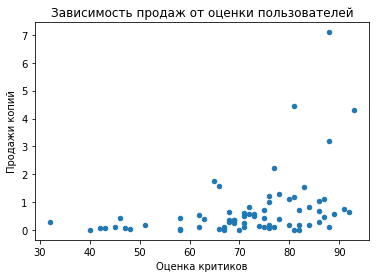


Корреляция между продажами копий и отзывами критиков для Wii 0.6829417215362368


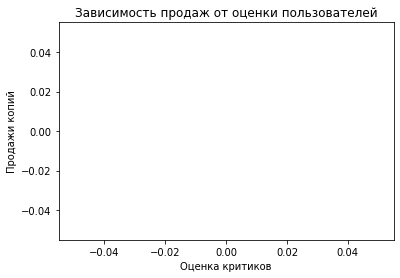


Корреляция между продажами копий и отзывами критиков для PC -0.09384186952476739


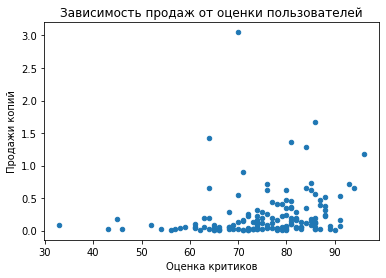


Корреляция между продажами копий и отзывами критиков для PSV 0.0009424723319108626


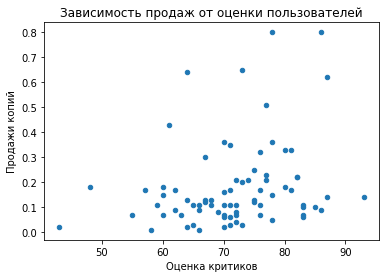


Корреляция между продажами копий и отзывами критиков для DS nan


/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


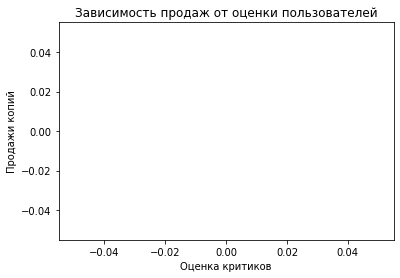


Корреляция между продажами копий и отзывами критиков для PSP -0.9999999999999999


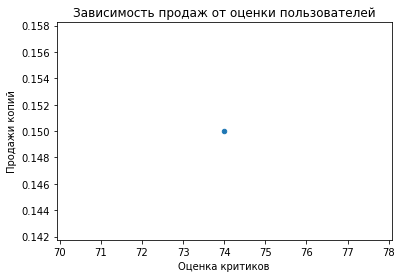

In [54]:
for platforms in games_actual['platform'].unique():
    pl = games_actual.loc[games_actual['platform'] == platforms, :]
    print('Корреляция между продажами копий и отзывами критиков для', platforms, pl['total_sales'].corr(pl['user_score']))
    pl.plot(x='critic_score', y='total_sales', kind='scatter', alpha=1,title='Зависимость продаж от оценки пользователей')
    plt.xlabel('Оценка критиков')
    plt.ylabel('Продажи копий')
    plt.show()
    print()

In [36]:
for platforms in games_actual['platform'].unique():
    print(platforms)
    print(games_actual.loc[games_actual['platform'] == platforms, 'total_sales'].describe())
    print('')

PS3
count    345.000000
mean       0.525884
std        1.451939
min        0.010000
25%        0.040000
50%        0.150000
75%        0.510000
max       21.050000
Name: total_sales, dtype: float64

X360
count    186.000000
mean       0.735484
std        1.663275
min        0.010000
25%        0.080000
50%        0.265000
75%        0.795000
max       16.270000
Name: total_sales, dtype: float64

PS4
count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64

3DS
count    303.000000
mean       0.472772
std        1.381347
min        0.010000
25%        0.040000
50%        0.090000
75%        0.280000
max       14.600000
Name: total_sales, dtype: float64

XOne
count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: total_sales, dtype: float64

Wii

Обший вывод:
1. Есть небольшая связь между оценкой критиков и продажами. Чем выше оценка, тем больше продаж (но помним, что эта корреляция не равна 1)
2. Оценка пользователей не сильно влиет на продажи. Но можем выдвинуть гипотезу, что иногда к более популярным играм пользователи более требовательны (больше ожиданий)

### Задание 6:
Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

<AxesSubplot:title={'center':'Суммарные продажи копий с разбивкой по жанрам'}, xlabel='genre'>

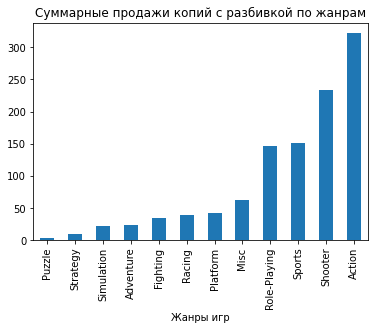

In [37]:
genres = games_actual.groupby('genre')['total_sales'].sum().sort_values()
display(genres.plot(kind='bar', title='Суммарные продажи копий с разбивкой по жанрам'))
plt.xlabel('Жанры игр')
plt.show()
#print(games_actual['genre'].unique())
#print(games_actual.pivot_table(index='genre', values='total_sales', aggfunc='sum'))


In [38]:
genres = games_actual.groupby('genre')['total_sales'].median().sort_values()
print(genres)

genre
Adventure       0.030
Puzzle          0.060
Strategy        0.080
Misc            0.100
Simulation      0.100
Action          0.110
Racing          0.120
Fighting        0.125
Role-Playing    0.125
Platform        0.225
Sports          0.240
Shooter         0.450
Name: total_sales, dtype: float64


Вывод (по медиане):
1. Самые популярные направления - Shooter, Sports,Platform
2. Самые непопулярные направления - Adventure, Puzzle, Strategy

## Шаг 4. Составьте портрет пользователя каждого региона  <a class="anchor" id="fourth-bullet"></a>

### Задание 1:
Определите для пользователя каждого региона (NA, EU, JP):
1. Самые популярные платформы (топ-5). Опишите различия в долях продаж.
2. Самые популярные жанры (топ-5). Поясните разницу.
3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

AxesSubplot(0.125,0.125;0.775x0.755)


/tmp/ipykernel_209/2818109547.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(games_actual.groupby('platform')['na_sales','eu_sales', 'jp_sales'].


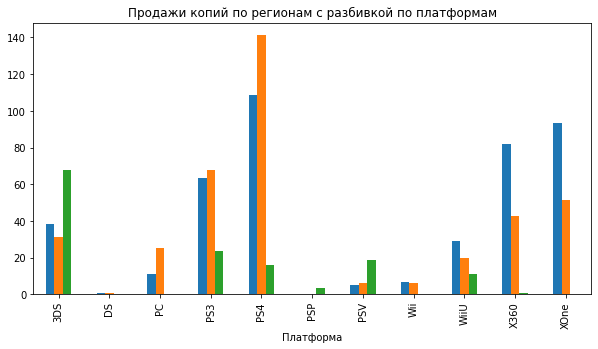

In [39]:
print(games_actual.groupby('platform')['na_sales','eu_sales', 'jp_sales'].
     sum().plot(kind='bar',figsize=(10,5), legend=False,
           title='Продажи копий по регионам с разбивкой по платформам'))
plt.xlabel('Платформа')
plt.show()

#print(games_actual.groupby('platform')['na_sales','eu_sales', 'jp_sales'].sum())

Северная Америка ('na_sales', <AxesSubplot:title={'center':'Продажи копий с разбивкой по платформам'}, xlabel='platform'>)


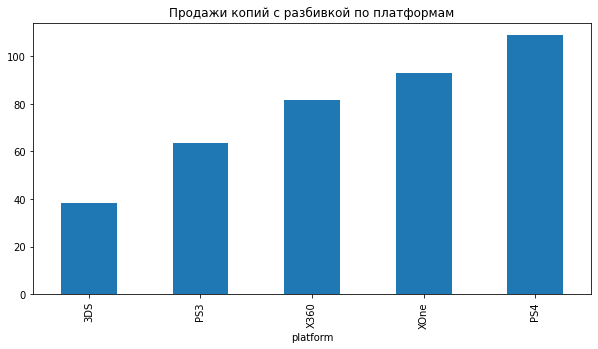

In [40]:
def regions(data):
    return data, games_actual.groupby('platform')[data].sum().sort_values().tail(5).plot(kind='bar',figsize=(10,5), legend=False, title='Продажи копий с разбивкой по платформам')

    
print( "Северная Америка", regions('na_sales'))

Европа ('eu_sales', <AxesSubplot:title={'center':'Продажи копий с разбивкой по платформам'}, xlabel='platform'>)


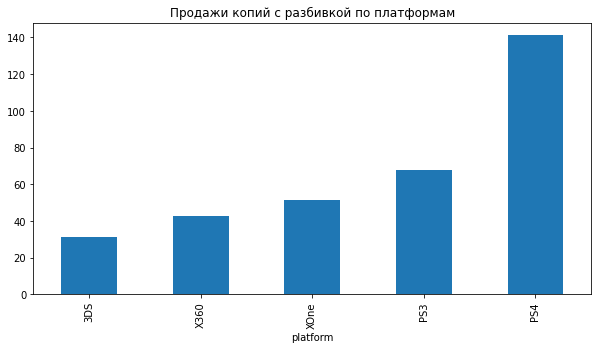

In [41]:
print( "Европа",regions('eu_sales'))

Япония ('jp_sales', <AxesSubplot:title={'center':'Продажи копий с разбивкой по платформам'}, xlabel='platform'>)


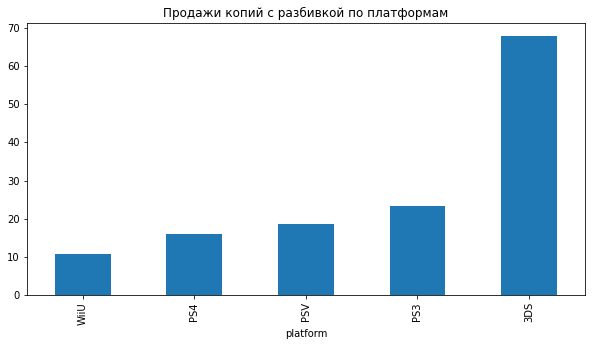

In [42]:
print( "Япония", regions('jp_sales'))

Вывод:
1. Наиболее востребованная платформа-  PS4. 
2. Больше всего играют в Северной Америке и Европе
3. В Северной Америке предпочитают использовать в основном PS4. Далее по популярности идет Xone
4. В Европе предпочитают использовать в основном PS4. Далее по популярности идет PS3
5. В Японии играют на 3DS, PS3, PSV

AxesSubplot(0.125,0.125;0.775x0.755)
              na_sales  eu_sales  jp_sales
genre                                     
Action          126.05    118.13     40.49
Adventure         7.14      8.25      5.82
Fighting         15.55      8.55      7.65
Misc             27.49     20.04      9.20
Platform         18.14     15.58      4.79
Puzzle            0.83      1.00      1.18
Racing           12.96     20.19      2.30
Role-Playing     46.40     36.97     51.04
Shooter         109.74     87.86      6.61
Simulation        4.86     10.92      4.52
Sports           65.27     60.52      5.41
Strategy          3.28      4.22      1.77


/tmp/ipykernel_209/4005939706.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(games_actual.groupby('genre')['na_sales','eu_sales', 'jp_sales']
/tmp/ipykernel_209/4005939706.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(games_actual.groupby('genre')['na_sales','eu_sales', 'jp_sales'].sum())


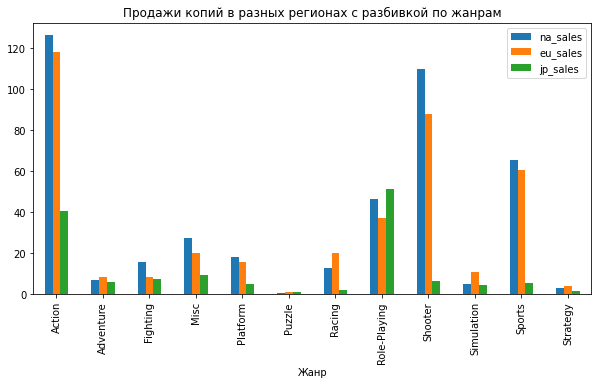

In [43]:
print(games_actual.groupby('genre')['na_sales','eu_sales', 'jp_sales']
      .sum().plot(kind='bar',figsize=(10,5), legend=True,
                  title='Продажи копий в разных регионах с разбивкой по жанрам'))
plt.xlabel('Жанр')

print(games_actual.groupby('genre')['na_sales','eu_sales', 'jp_sales'].sum())

Северная Европа
AxesSubplot(0.125,0.125;0.775x0.755)


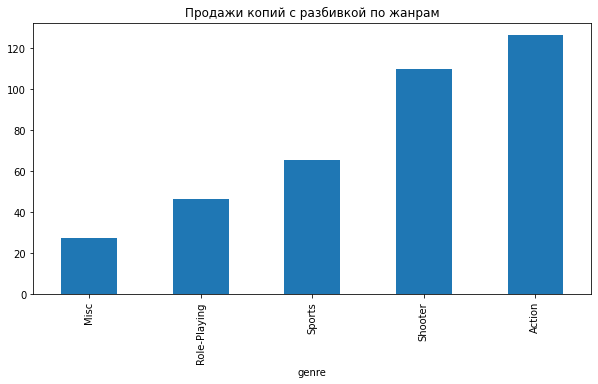

In [44]:
def genres(data):
    return games_actual.groupby('genre')[data].sum().sort_values().tail(5).plot(kind='bar',figsize=(10,5), legend=False,
                  title='Продажи копий с разбивкой по жанрам')

print('Северная Европа')
print(genres('na_sales'))

Европа
AxesSubplot(0.125,0.125;0.775x0.755)


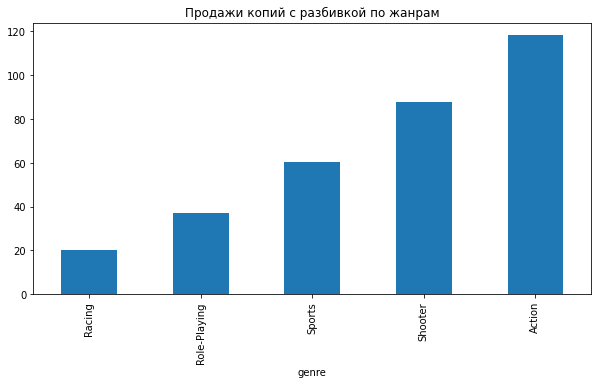

In [45]:
print('Европа')
print(genres('eu_sales'))

Япония
AxesSubplot(0.125,0.125;0.775x0.755)


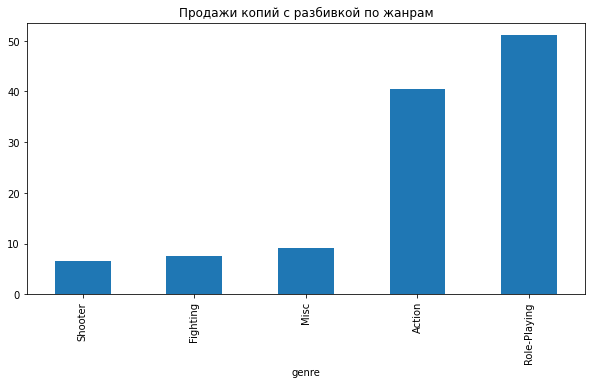

In [46]:
print('Япония')
print(genres('jp_sales'))

Вывод:
1. В Северной Америке и Европе самые популяные жанры Action, Shooter, Sports. 
2. В Японии - Role-Playing, Action, Misc. 

Расчет по суммарным продажам копий

In [47]:
#games_actual['rating'] = games_actual['rating'].fillna('other')
games_actual.loc[games_actual['rating'].isna(),'rating'] = games_actual['rating'].fillna('Other') 

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


AxesSubplot(0.125,0.125;0.775x0.755)
        na_sales  eu_sales  jp_sales
rating                              
E          79.05     83.36     15.14
E10+       54.24     42.69      5.89
M         165.21    145.32     14.11
Other      89.42     78.91     85.05
T          49.79     41.95     20.59


/tmp/ipykernel_209/1709410299.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(games_actual.groupby('rating')['na_sales','eu_sales', 'jp_sales'].
/tmp/ipykernel_209/1709410299.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(games_actual.groupby('rating')['na_sales','eu_sales', 'jp_sales'].sum())


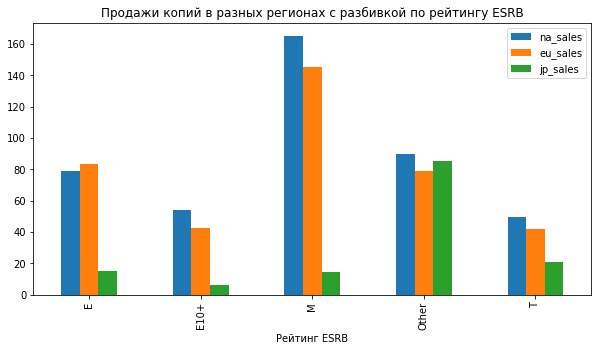

In [48]:
print(games_actual.groupby('rating')['na_sales','eu_sales', 'jp_sales'].
      sum().plot(kind='bar',figsize=(10,5), legend=True,
                 title='Продажи копий в разных регионах с разбивкой по рейтингу ESRB'))
plt.xlabel('Рейтинг ESRB')

print(games_actual.groupby('rating')['na_sales','eu_sales', 'jp_sales'].sum())

Северная Европа
AxesSubplot(0.125,0.125;0.775x0.755)


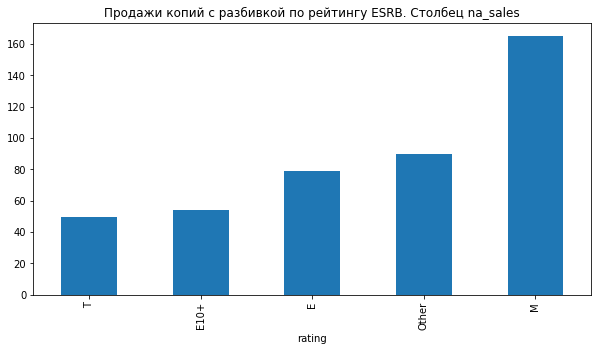

In [49]:
def rating(data):
    return games_actual.groupby('rating')[data].sum().sort_values().plot(kind='bar',figsize=(10,5), legend=False,
                  title=f'Продажи копий с разбивкой по рейтингу ESRB. Столбец {data}')

print('Северная Европа')
print(rating('na_sales'))

Европа
AxesSubplot(0.125,0.125;0.775x0.755)


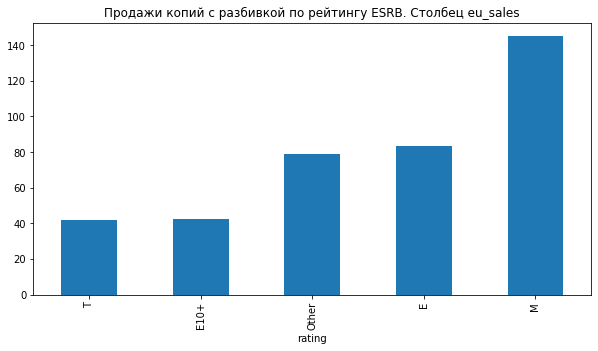

In [50]:
print('Европа')
print(rating('eu_sales'))

Япония
AxesSubplot(0.125,0.125;0.775x0.755)


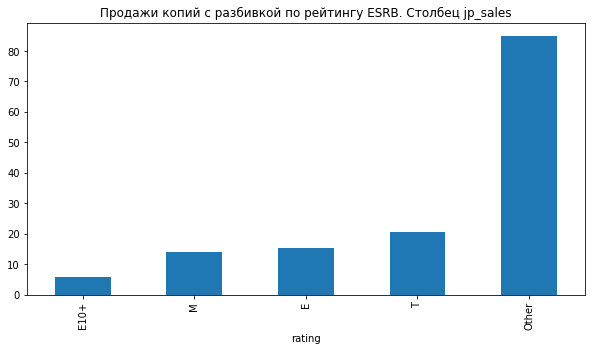

In [51]:
print('Япония')
print(rating('jp_sales'))

Вывод:
1. В Северной Америке и Европе больше всего продается игр в рейтингом M
2. В Японии на первом месте пропуски. Далее - рейтинг Т
    
Подробности про рейтинг:     
М - лица старше 17 лет     
Е - для все возрастов      
Т - лица старше 13 лет     
Е10+ - лица старше 10 лет    

## Шаг 5. Проверьте гипотезы  <a class="anchor" id="fifth-bullet"></a>

### Задание 1:

Гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Поясните:    
Как вы сформулировали нулевую и альтернативную гипотезы    
Какой критерий применили для проверки гипотез и почему.

Нулевая гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые (=)        
Альтернативная гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC разные (!=)

In [52]:
alpha = 0.05
pc = games_actual.query('platform == "PC"')

xone = games_actual.query('platform == "XOne"')

pc = pc['user_score']  #удаляю пропуски тк иначе в итоге выполнения функции ttest_ind получаю nan
pc = pc.dropna()

xone = xone['user_score']
xone = xone.dropna()


results = st.ttest_ind(pc,xone, equal_var=True)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Вывод:
1. Значение p-value показывает: пользовательские рейтинги платформ Xbox One и PC не имеют значимых различий. 

По расчетам:
1. Беру уровень статистической значимости в 5%
2. Использую метод ttest_ind, тк нужно сравнить 2 средних выборок
3. Параметр equal_var использую тк размеры выборок должны быть разными 

### Задание 2:

Гипотеза - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Поясните:    
Как вы сформулировали нулевую и альтернативную гипотезы    
Какой критерий применили для проверки гипотез и почему.

Нулевая гипотеза - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны (=)     
Альтернативная гипотеза - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные (!=)

In [53]:
action = games_actual.query('genre == "Action"')
action = action['user_score']
action = action.dropna() #удаляю пропуски тк иначе в итоге выполнения функции ttest_ind получаю nan

sports = games_actual.query('genre == "Sports"')
sports = sports['user_score']
sports = sports.dropna()

alpha = 0.05

genre_results = st.ttest_ind(action, sports, equal_var=False)
print('p-значение:', genre_results.pvalue)

if genre_results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Гипотезу - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные - получилось отвергнуть. Общими словами - рейтинги имеют значимые различия

Расчеты аналогичны предыдущим

## Шаг 6. Напишите общий вывод   <a class="anchor" id="sixth-bullet"></a>

***Общие выводы по всему исследованию:*** 
1. С 1993 года виден устойчивый рост интереса к игровой индустрии. Пик по выпуску игр пришелся на 2008 год. 
2. В 2016 году продажи игр снизились в 2 раза (по сравнению с 2015г), хотя объемы появления новых игр снизились незначительно
3. Мединное значение жизни одной платформы - 6 лет. Также есть и выбросы, например PC, живет уже 31 год (на момент 2016 года)
4. Самая популярная платформа в период с 2013 до 2016 год - PS4
5. Медианное значение продаж одной игры на платформах от 80 до 265 тысяч проданных копий
6. Нельзя однозначно сказать, что чем выше оценки пользователей повышают продажи
7. Оценки критиков немного повышают продажи копий (но корреляция меньше 1)
8. Самые популярные жанры по всем платформам с 2013 по 2016гг - Shooter, Sports, Plaform. Непопулярные - Adventure, Puzzle, Strategy
9. В период в 2013 по 2016гг наиболее востребованы игры в Северной Америке и Европе. При этом в Серевной Америке в основном используют PS4, Xone. А в Европе - PS4, PS3
10. В Японии в период с 2013 по 2016гг наиболее часто покупали игра для следующий платформ: 3DS, PS3, PSV
11. Включая выбросы самые популярные жанры в Северной Америке и Европе Action, Shooter, Sports. В Японии - Role-Playing, Action, Misc
12. В Северной мерике и Европе больше всего продаются игры с рейтингом М. В Японии с рейтингом Т
13. Пользовательские рейтинги платформ Xbox One и PC не имеют значимых различий
14. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») имеют значимые различия


***Рекомендации по выпуску игр на 2017 год:***
1. Использовать PS4 или Xone
2. Жанр игры - Action, Shooter, Sports
3. Ориентация на рынки: Европа и Северная Америка

***Риски:***
1. Необходимо обратить внимание на спад в продажах в 2016 году и изучить возможные причины такого поведения пользователей
2. Выходить на рынок Японии тк он несколько отличается от остальных
3. Выпускать игра непопулярных направлений (например, Puzzle)